Lectura de archivos
Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
Importe la base de datos bfi.csv y asígnela a un objeto df.
Solicite las primeras 5 observaciones con head.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import seaborn as sns

### Lectura de archivos

In [2]:
df = pd.read_csv('bfi.csv')
df

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [3]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Preprocesamiento
- Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
- Analice el patrón de datos perdidos con missingno. 
- Comente cuáles son las principales variables con mayores tasas de valores perdidos.
- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

<Axes: >

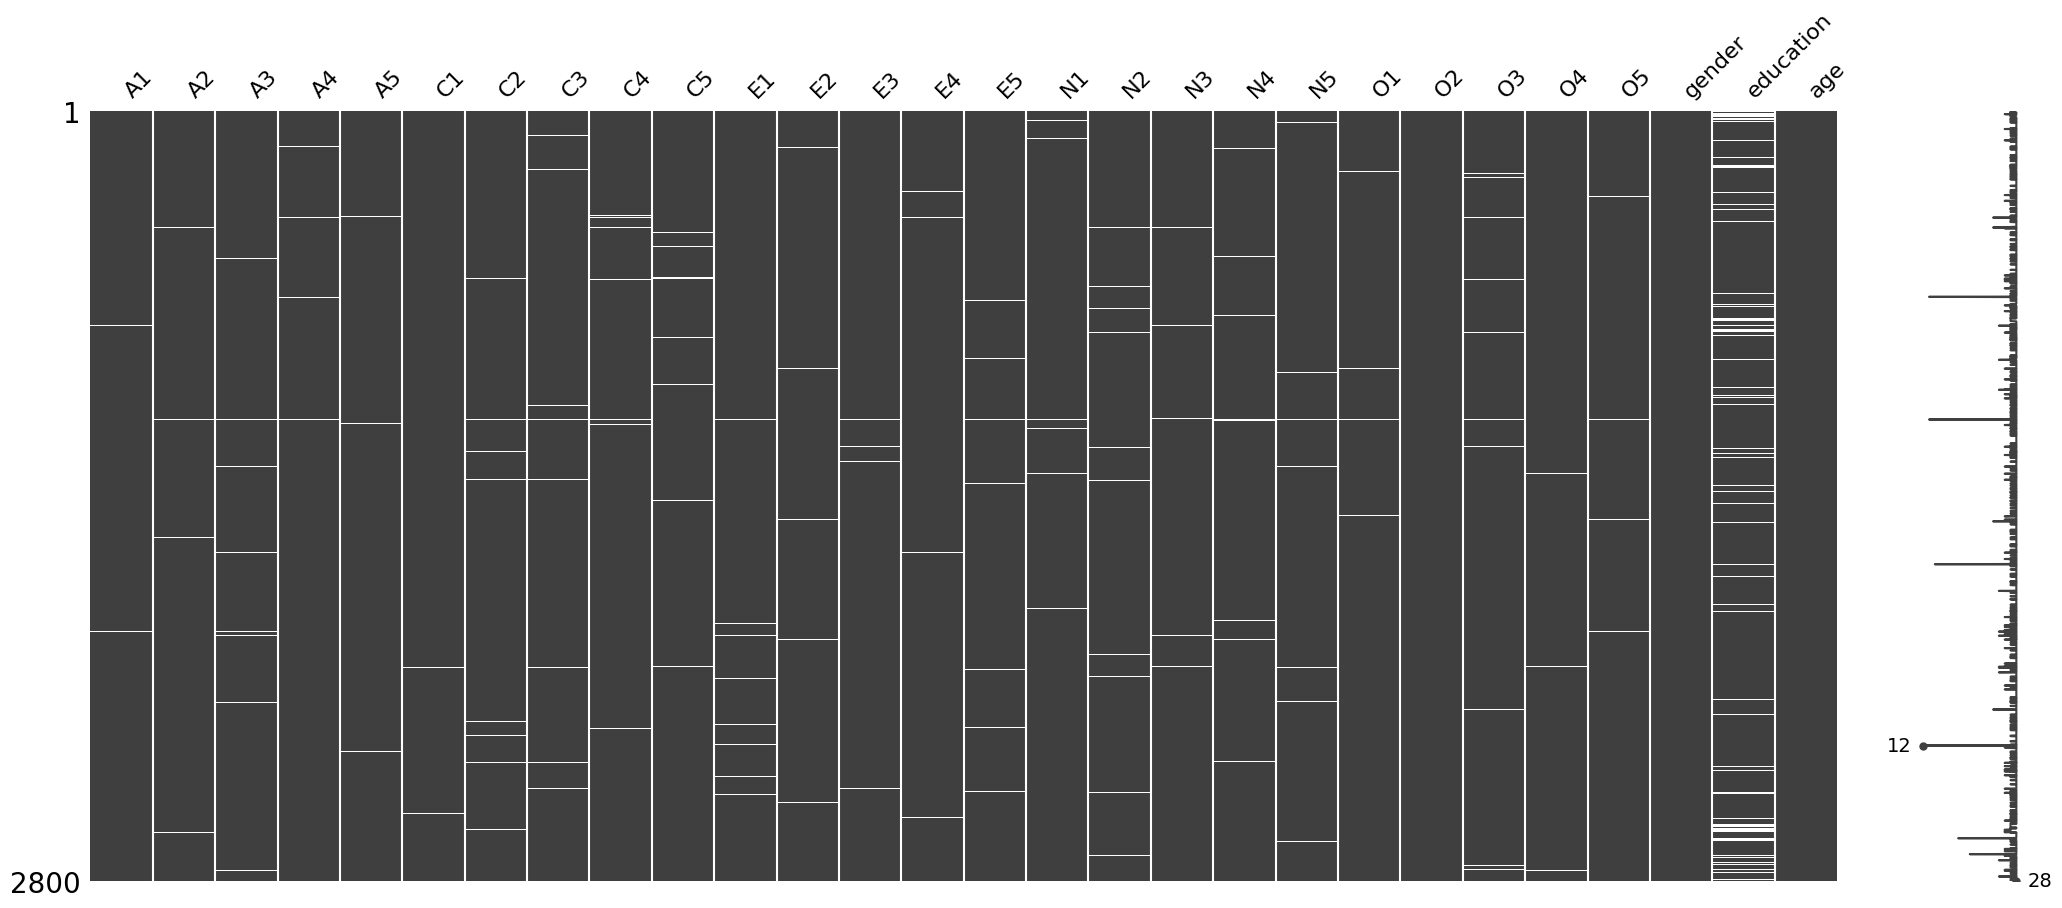

In [5]:
msno.matrix(df)

#### Se puede ver que en education es donde mas valores faltantes hay

In [6]:
missing_values = df.isna().mean() * 100
print("Las principales variables con valores faltantes son:")
print(missing_values.sort_values(ascending=False).head(10))

Las principales variables con valores faltantes son:
education    7.964286
N4           1.285714
N5           1.035714
O3           1.000000
A2           0.964286
A3           0.928571
C4           0.928571
E3           0.892857
C2           0.857143
E1           0.821429
dtype: float64


<Axes: >

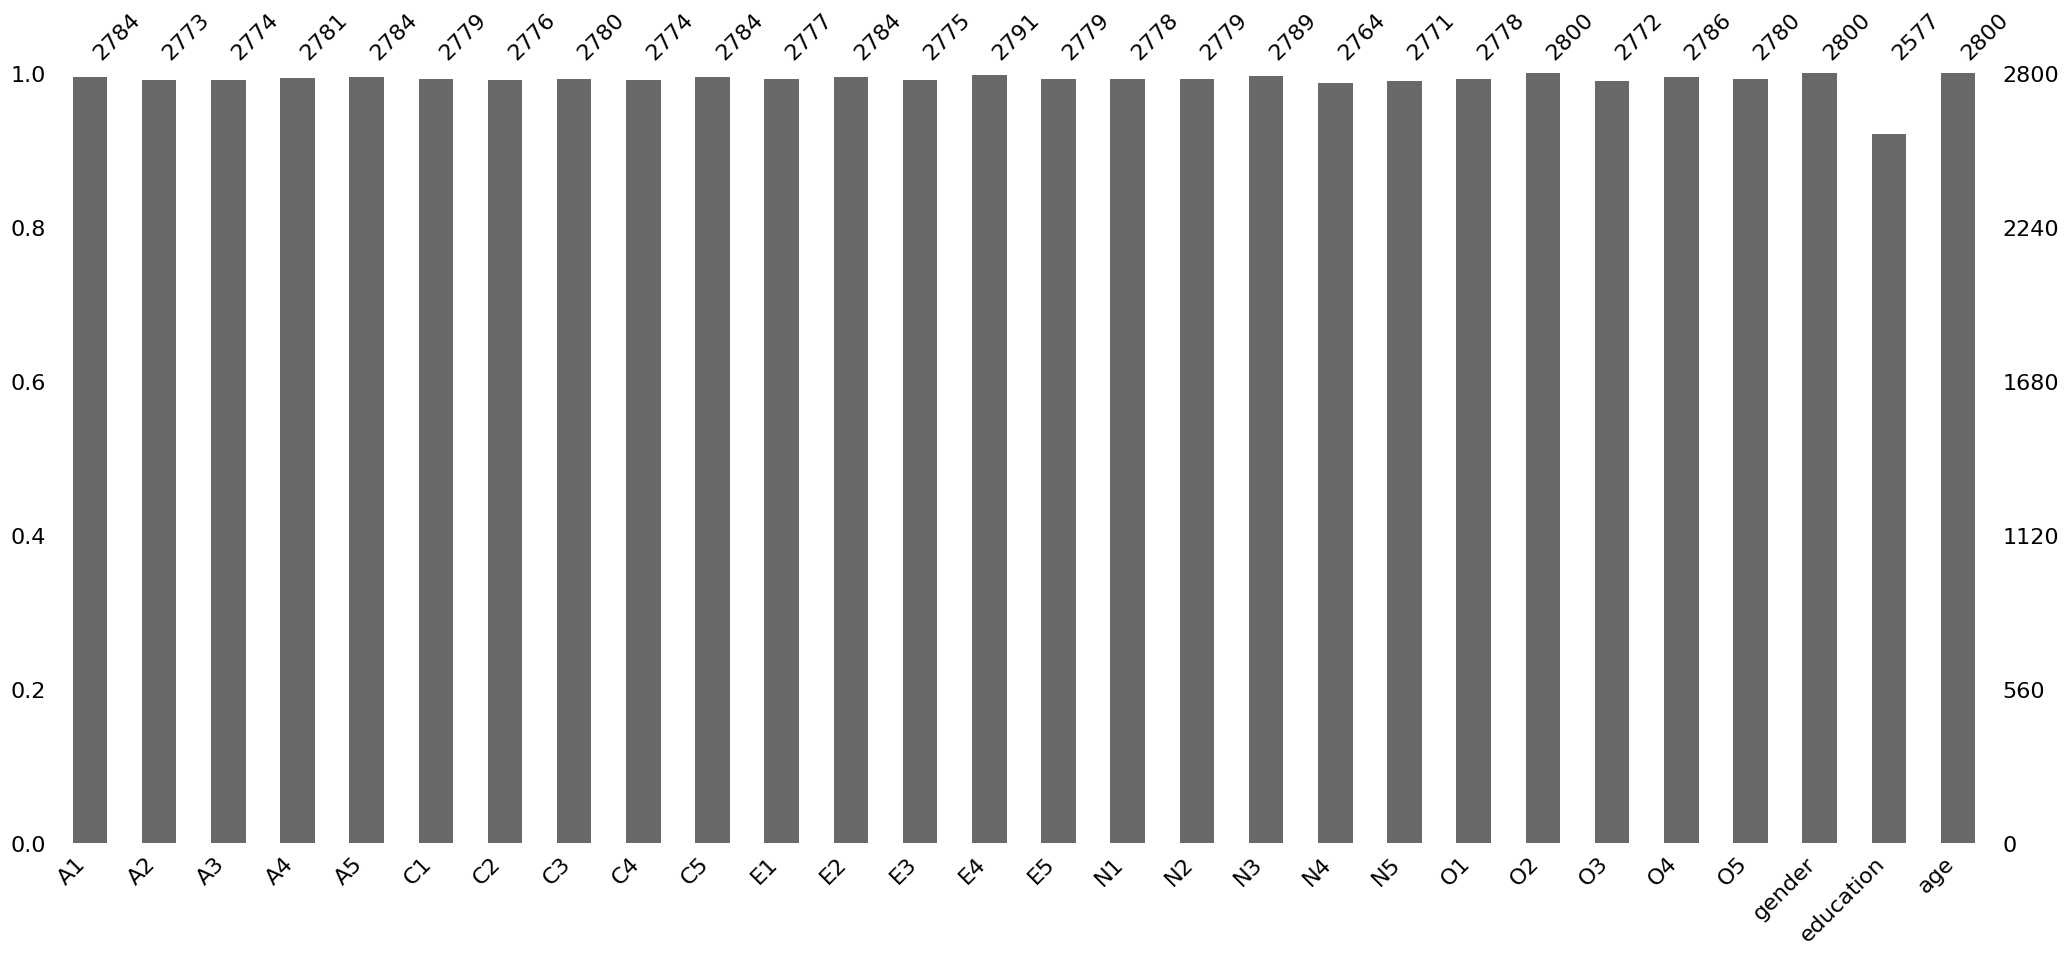

In [7]:
msno.bar(df)

In [8]:
df_sin_faltas = df.dropna()
print(f"Se eliminaron {len(df) - len(df_sin_faltas)} filas con valores faltantes.")

Se eliminaron 564 filas con valores faltantes.


<Axes: >

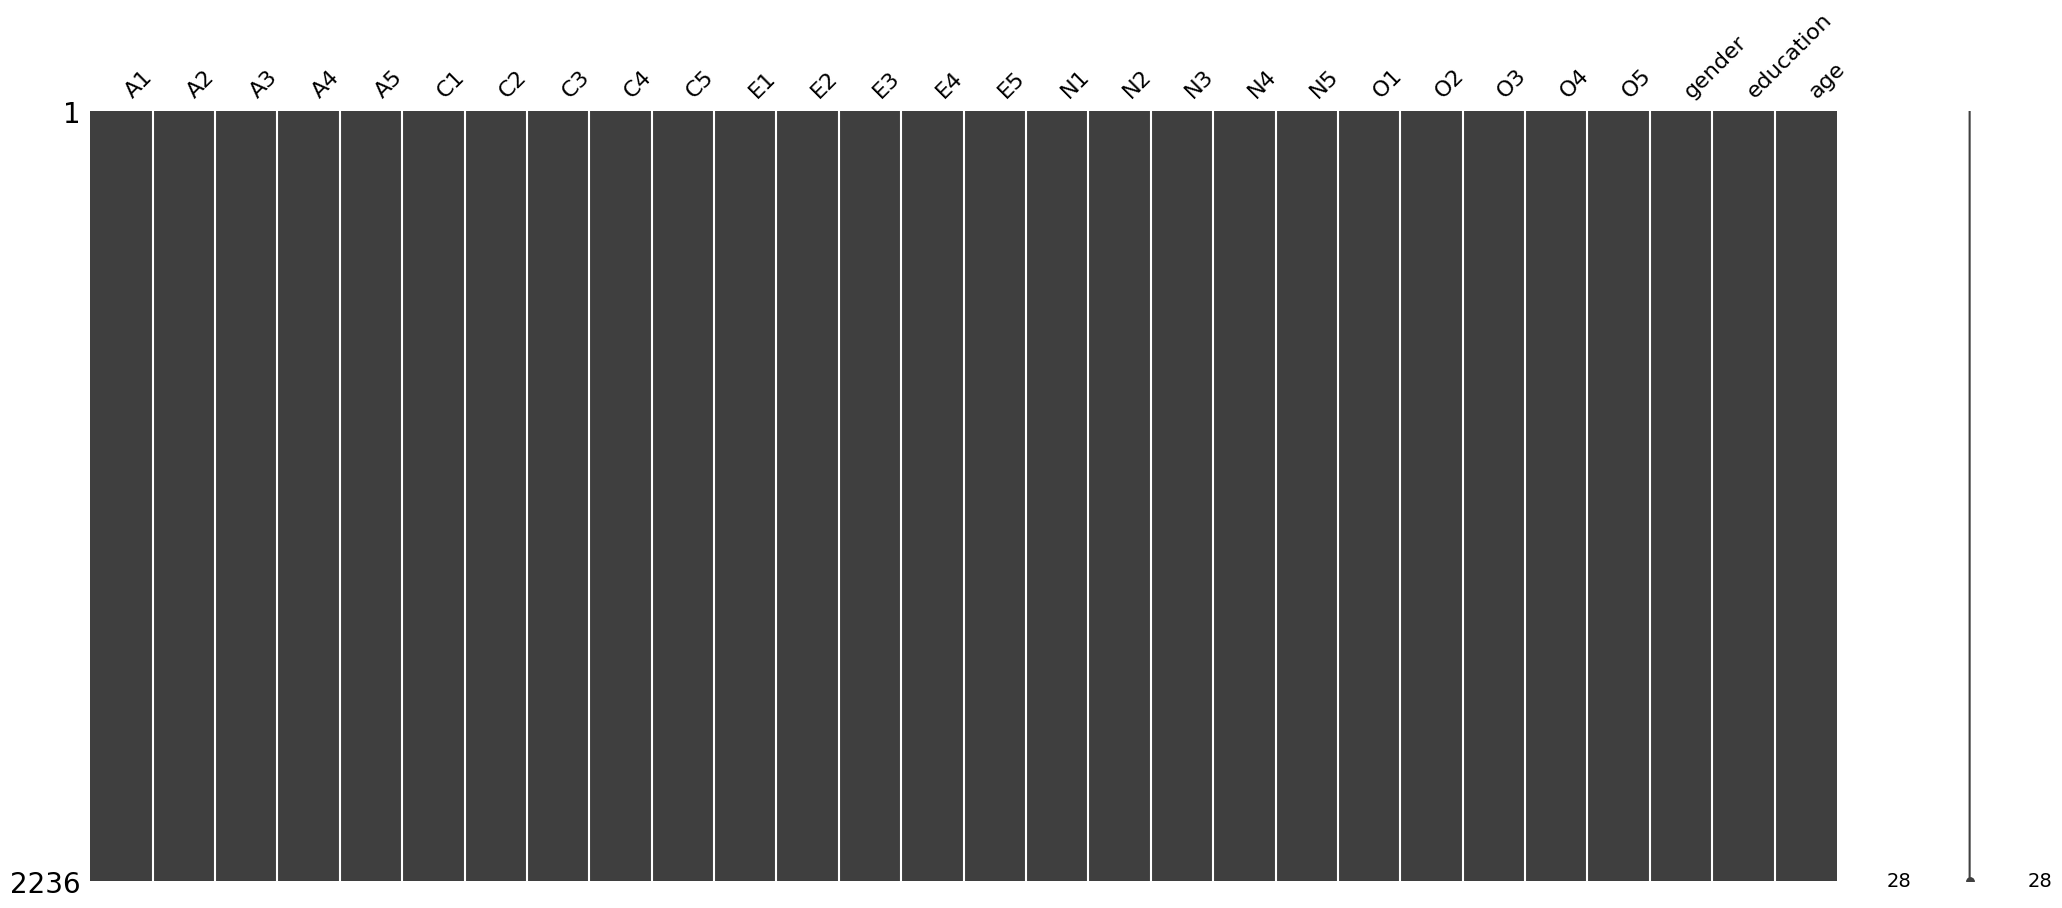

In [9]:
msno.matrix(df_sin_faltas)

In [10]:
df_sin_faltas.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


### Descripción
- Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
- Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.
- Comente sobre los principales patrones de correlación entre las preguntas de la batería

In [11]:
df_sin_faltas = df.copy()
df_preguntas= df_sin_faltas.iloc[:,0:28].dropna()


In [12]:
medias = df_preguntas.mean()
medias

A1            2.365385
A2            4.834079
A3            4.629249
A4            4.749553
A5            4.584973
C1            4.569767
C2            4.401163
C3            4.322898
C4            2.500894
C5            3.255367
E1            2.969589
E2            3.121199
E3            4.009839
E4            4.430680
E5            4.418605
N1            2.908318
N2            3.485689
N3            3.198569
N4            3.175313
N5            2.952147
O1            4.821556
O2            2.689177
O3            4.483005
O4            4.948122
O5            2.455277
gender        1.671288
education     3.191413
age          29.510286
dtype: float64

In [13]:
df_medias = pd.DataFrame({'Pregunta': medias.index, 'Media': medias.values})

C:\Users\carol\AppData\Local\Temp\ipykernel_10080\230393083.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='Pregunta', y='Media', data=df_medias, kind='strip', palette='RdYlBu', height=5, aspect=2)


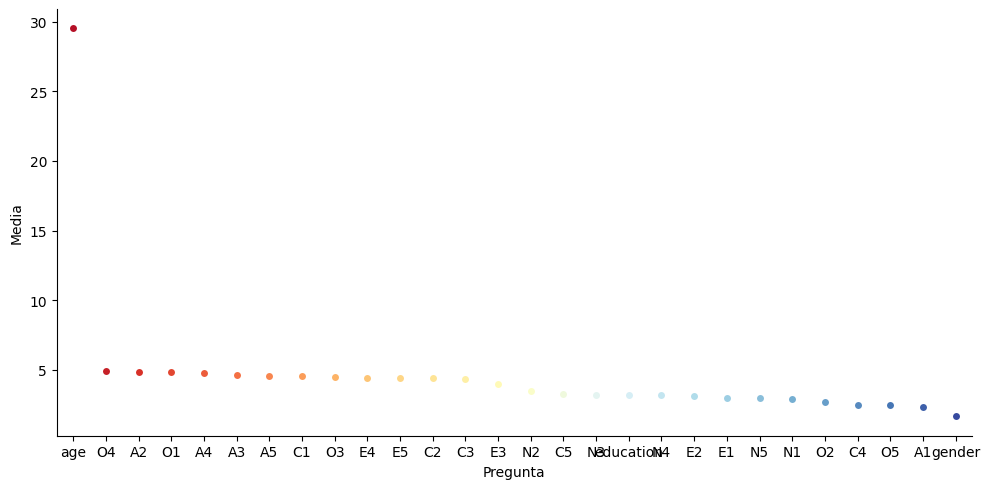

In [14]:
df_medias = df_medias.sort_values('Media', ascending=False)
sns.catplot(x='Pregunta', y='Media', data=df_medias, kind='strip', palette='RdYlBu', height=5, aspect=2)



In [15]:
matriz = df_preguntas.corr()

In [16]:
matriz

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
A1,1.000000,-0.340197,-0.263031,-0.143494,-0.186059,0.019948,0.013543,-0.009442,0.099951,0.024136,...,0.044236,0.007946,0.002522,0.066318,-0.062391,-0.089590,0.108565,-0.167228,-0.136587,-0.136628
A2,-0.340197,1.000000,0.484847,0.342175,0.382181,0.091673,0.125589,0.185624,-0.139100,-0.110892,...,-0.086230,0.024141,0.108006,0.032444,0.146559,0.053878,-0.079440,0.208288,0.020530,0.090747
A3,-0.263031,0.484847,1.000000,0.376834,0.502886,0.101067,0.144902,0.132825,-0.116813,-0.146570,...,-0.132673,-0.040365,0.140990,0.030827,0.215028,0.024206,-0.037213,0.156942,0.003022,0.042270
A4,-0.143494,0.342175,0.376834,1.000000,0.315100,0.082565,0.218129,0.131997,-0.160647,-0.239115,...,-0.159955,-0.002438,0.042507,0.050961,0.041559,-0.062844,0.035086,0.130168,-0.019404,0.114304
A5,-0.186059,0.382181,0.502886,0.315100,1.000000,0.123506,0.109298,0.130828,-0.117426,-0.162885,...,-0.210788,-0.076530,0.146134,0.001511,0.221910,0.003594,-0.042743,0.108401,0.015265,0.101280
C1,0.019948,0.091673,0.101067,0.082565,0.123506,1.000000,0.426832,0.319043,-0.349772,-0.250581,...,-0.090103,-0.049890,0.177091,-0.132752,0.187587,0.081690,-0.131124,0.004523,0.039745,0.081762
C2,0.013543,0.125589,0.144902,0.218129,0.109298,0.426832,1.000000,0.355576,-0.383390,-0.299011,...,-0.037006,0.049420,0.155080,-0.050808,0.178356,0.031215,-0.056560,0.060895,0.011142,-0.000663
C3,-0.009442,0.185624,0.132825,0.131997,0.130828,0.319043,0.355576,1.000000,-0.354453,-0.352470,...,-0.129318,-0.035458,0.090573,-0.032512,0.057176,-0.000161,0.004521,0.043894,0.059661,0.051096
C4,0.099951,-0.139100,-0.116813,-0.160647,-0.117426,-0.349772,-0.383390,-0.354453,1.000000,0.484126,...,0.279304,0.212250,-0.098238,0.206884,-0.069876,0.071812,0.183007,-0.074657,-0.035257,-0.118543
C5,0.024136,-0.110892,-0.146570,-0.239115,-0.162885,-0.250581,-0.299011,-0.352470,0.484126,1.000000,...,0.350796,0.183551,-0.087541,0.118552,-0.065530,0.140063,0.048952,-0.089002,0.041173,-0.072691


<Axes: >

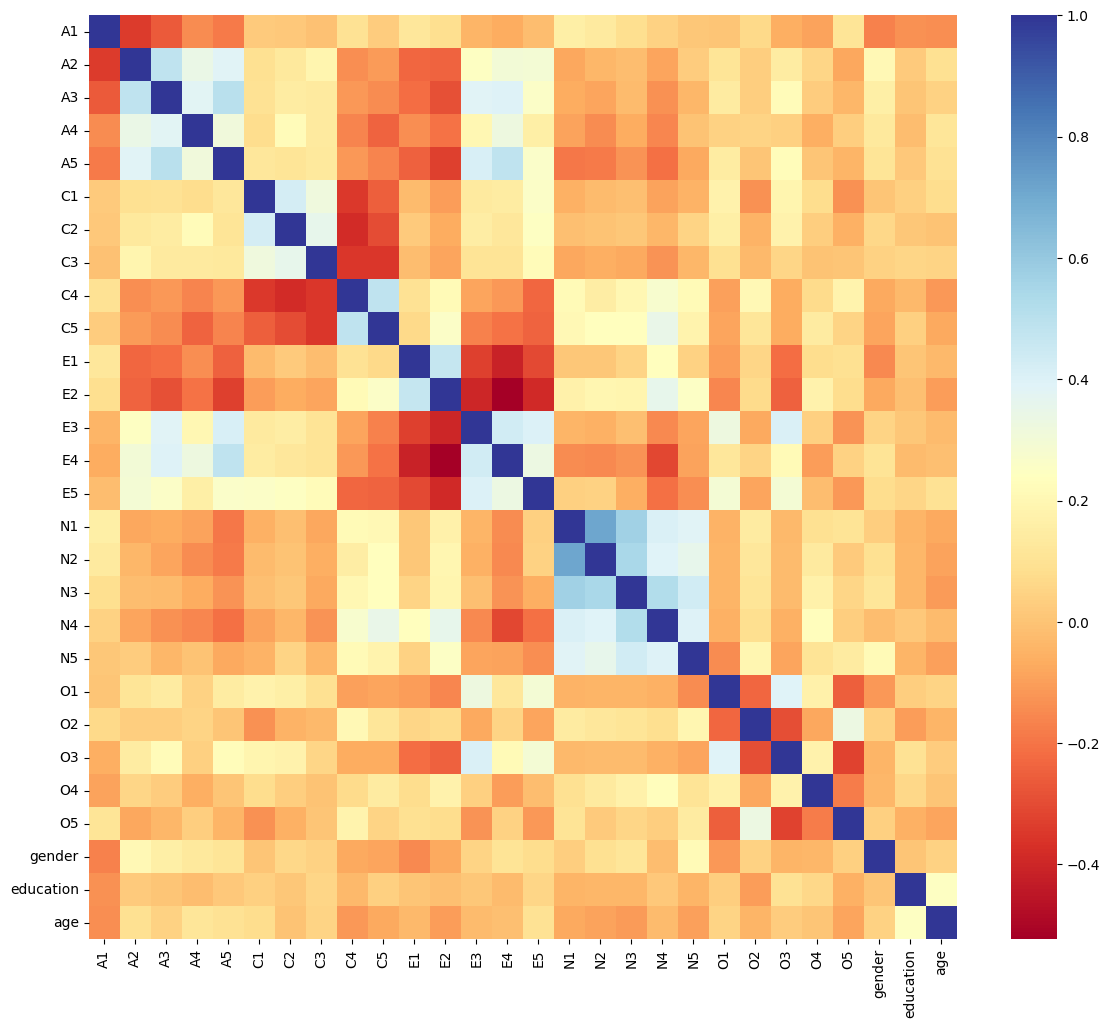

In [17]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matriz, cmap='RdYlBu', annot=False)

COMENTAR SOBRE LOS PRINCIPALES PATRONES DE CORRELACION ENTRE LAS PREGUNTAS

In [18]:
df_preguntas.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


### Extracción de factores
- Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
- Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
- Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [19]:
import factor_analyzer as fact

fact.calculate_bartlett_sphericity(df_preguntas)

(17331.211021010582, 0.0)

In [20]:
fact.calculate_kmo(df_preguntas)

(array([0.751458  , 0.84391846, 0.87269382, 0.86207628, 0.89617865,
        0.83315057, 0.78363079, 0.84271618, 0.82867857, 0.85703656,
        0.84554984, 0.88180862, 0.89023244, 0.87441996, 0.8917636 ,
        0.7727388 , 0.77836233, 0.85870928, 0.87853505, 0.84647809,
        0.85249597, 0.78058553, 0.83393931, 0.78636037, 0.76236777,
        0.71227746, 0.58467802, 0.60871974]),
 0.8387026512986826)

In [21]:
bartlett, p_value = fact.calculate_bartlett_sphericity(df_preguntas)
kmo = fact.calculate_kmo(df_preguntas)

print("Prueba de esfericidad de Barlett:")
print("Estadístico de Bartlett:", bartlett)
print("p-value:", p_value)

print("Prueba de Kaiser-Meyer-Olkin (KMO):")
print("KMO global:", kmo[1])

Prueba de esfericidad de Barlett:
Estadístico de Bartlett: 17331.211021010582
p-value: 0.0
Prueba de Kaiser-Meyer-Olkin (KMO):
KMO global: 0.8387026512986826


#### Viendo estos valores, se puede deducir que nuestra matriz de correlaciones es útil para poder hacer un análisis factorial como el que se pide. 
#### Los valores de los resultados indican que hay suficientes correlaciones significativas entre las preguntas de la batería.

Text(0.5, 1.0, 'Scree plot')

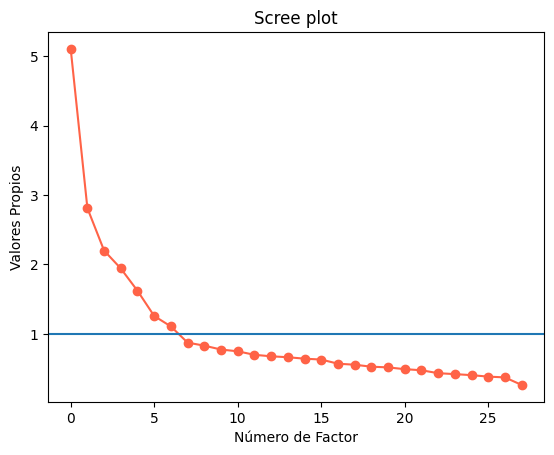

In [22]:
factorize = fact.FactorAnalyzer(n_factors=2, rotation='varimax')
factorize.fit(df_preguntas)
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]
# graficamos los eigenvalues contra la cantidad de dimensiones estimables
plt.plot(range(len(factor_screeplot)), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
plt.axhline(1)
plt.title("Scree plot")

In [23]:
factor_loadings = factorize.loadings_
factor_loadings = pd.DataFrame(factor_loadings, index=df_preguntas.columns, columns=['Factor 1', 'Factor 2'])
factor_loadings

,Factor 1,Factor 2
A1,-0.203009,0.086552
A2,0.537765,0.004537
A3,0.601842,-0.021748
A4,0.410195,-0.103107
A5,0.579439,-0.147889
C1,0.318286,-0.083844
C2,0.338896,-0.029419
C3,0.286307,-0.128711
C4,-0.313940,0.326634
C5,-0.327314,0.362404


In [24]:
factorize.fit(df_preguntas)
factor_loadings = factorize.loadings_
#items a cada factor
for factor_num, factor_loadings in enumerate(factor_loadings.T):
    associated_items = df_preguntas.columns[np.abs(factor_loadings) > 0.5]
    print(f"Factor {factor_num + 1}: {', '.join(associated_items)}")


Factor 1: A2, A3, A5, E2, E3, E4, E5
Factor 2: N1, N2, N3, N4, N5


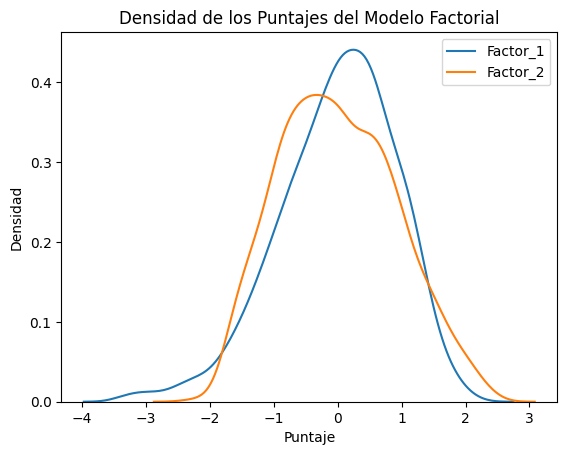

In [25]:
factor_scores = factorize.transform(df_preguntas)
extract_factor_scores = pd.DataFrame(factor_scores, columns=[f'Factor_{i+1}' for i in range(factor_scores.shape[1])])
#densidad de cada puntaje
for column in extract_factor_scores.columns:
    sns.kdeplot(data=extract_factor_scores[column], label=column)
plt.xlabel('Puntaje')
plt.ylabel('Densidad')
plt.title('Densidad de los Puntajes del Modelo Factorial')
plt.legend()
plt.show()


In [29]:
import statsmodels.api as sm

X = df_preguntas[['gender', 'education', 'age']]
X = sm.add_constant(X)
#variable objetivo
y = df_preguntas['df_preguntas']
model = sm.OLS(y, X)
results = model.fit()
coefficients = results.params
print(coefficients)


KeyError: 'df_preguntas'